<a href="https://colab.research.google.com/github/NourhanZahran/Colab-notes/blob/main/Chemical_space_analysis_and_structural_diversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 6.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw, PandasTools, Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.ML.Descriptors import MoleculeDescriptors
PandasTools.RenderImagesInAllDataFrames(images=True)

In [11]:
import seaborn as sns

In [3]:
df = pd.read_csv("dataset_class.csv")
df.head()

,smiles_std,label
0,C1CCCn2c(nnc2C23CCC(c4nc(CC5CC5)no4)(CC2)CC3)CC1,0
1,CCCCCC12CCC(c3nnc(-c4ccccc4C(F)(F)F)n3C)(CC1)CC2,0
2,CC1(C)[C@@H](N)CC[C@]2(C)[C@H]3C(=O)C=C4[C@@H]...,0
3,CC(=O)O[C@H]1CC[C@]2(C)[C@H]3C(=O)C=C4[C@@H]5C...,0
4,CC(C)(C(=O)NC1CC[C@@H]2[C@H](CC1)[C@H]2C(N)=O)...,0


In [5]:
df.shape

(4392, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   smiles_std  4392 non-null   object
 1   label       4392 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.8+ KB


In [4]:
df["label"].value_counts()

0    3206
1    1186
Name: label, dtype: int64

<Axes: ylabel='count'>

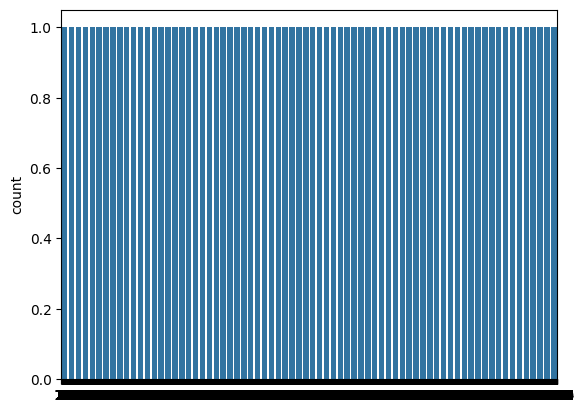

In [14]:
sns.countplot(df["label"])

,smiles_std,label,ROMol
0,C1CCCn2c(nnc2C23CCC(c4nc(CC5CC5)no4)(CC2)CC3)CC1,0,
1,CCCCCC12CCC(c3nnc(-c4ccccc4C(F)(F)F)n3C)(CC1)CC2,0,
2,CC1(C)[C@@H](N)CC[C@]2(C)[C@H]3C(=O)C=C4[C@@H]...,0,
3,CC(=O)O[C@H]1CC[C@]2(C)[C@H]3C(=O)C=C4[C@@H]5C...,0,
4,CC(C)(C(=O)NC1CC[C@@H]2[C@H](CC1)[C@H]2C(N)=O)...,0,

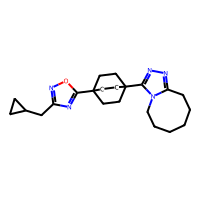
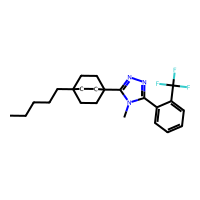
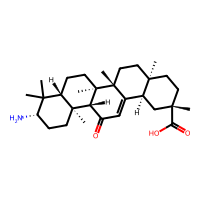
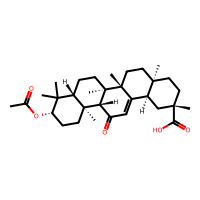
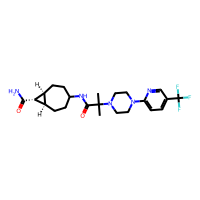

In [13]:
PandasTools.AddMoleculeColumnToFrame(df,"smiles_std")

df.head()

In [15]:
df.isna().sum()

smiles_std    0
label         0
ROMol         0
dtype: int64

In [16]:
desclist = [x[0] for x in Descriptors.descList]

desclist

['MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'SPS',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',


In [17]:
calc = MoleculeDescriptors.MolecularDescriptorCalculator(desclist)

In [23]:
rdkit_df = pd.DataFrame([calc.CalcDescriptors(mol) for mol in df["ROMol"]],columns = desclist)

rdkit_df.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,5.801980,5.801980,0.120704,0.120704,0.790726,32.714286,381.524,350.276,381.252861,150,...,0,0,0,0,0,0,0,0,0,0
1,13.487419,13.487419,0.028093,-4.407975,0.502365,26.793103,405.508,375.268,405.239183,158,...,0,0,0,0,0,0,0,0,1,0
2,14.233602,14.233602,0.025999,-0.697183,0.466854,54.117647,469.710,422.334,469.355594,190,...,0,0,0,0,0,0,0,0,0,0
3,14.357258,14.357258,0.064448,-0.729340,0.403607,50.486486,512.731,464.347,512.350175,206,...,0,0,0,0,0,0,0,0,0,0
4,13.133419,13.133419,0.017935,-4.399848,0.694125,26.939394,467.536,435.280,467.250810,182,...,0,0,0,0,0,0,0,0,0,0


In [24]:
rdkit_df.shape

(4392, 210)

In [25]:
df_ = df.join(rdkit_df)

In [26]:
df_.drop("ROMol",axis=1,inplace = True)
df_.head()

,smiles_std,label,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C1CCCn2c(nnc2C23CCC(c4nc(CC5CC5)no4)(CC2)CC3)CC1,0,5.801980,5.801980,0.120704,0.120704,0.790726,32.714286,381.524,350.276,...,0,0,0,0,0,0,0,0,0,0
1,CCCCCC12CCC(c3nnc(-c4ccccc4C(F)(F)F)n3C)(CC1)CC2,0,13.487419,13.487419,0.028093,-4.407975,0.502365,26.793103,405.508,375.268,...,0,0,0,0,0,0,0,0,1,0
2,CC1(C)[C@@H](N)CC[C@]2(C)[C@H]3C(=O)C=C4[C@@H]...,0,14.233602,14.233602,0.025999,-0.697183,0.466854,54.117647,469.710,422.334,...,0,0,0,0,0,0,0,0,0,0
3,CC(=O)O[C@H]1CC[C@]2(C)[C@H]3C(=O)C=C4[C@@H]5C...,0,14.357258,14.357258,0.064448,-0.729340,0.403607,50.486486,512.731,464.347,...,0,0,0,0,0,0,0,0,0,0
4,CC(C)(C(=O)NC1CC[C@@H]2[C@H](CC1)[C@H]2C(N)=O)...,0,13.133419,13.133419,0.017935,-4.399848,0.694125,26.939394,467.536,435.280,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_.columns

Index(['smiles_std', 'label', 'MaxAbsEStateIndex', 'MaxEStateIndex',
       'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt',
       'HeavyAtomMolWt',
       ...
       'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=212)

In [27]:
df_.to_csv("dataset_rdkit.csv",index=None)

In [44]:
import seaborn as sns

import matplotlib.pyplot as plt
import statistics


In [46]:
statistics.mean(df_["MolWt"])

403.87560314207667

In [47]:
statistics.median(df_["MolWt"])

404.53200000000027

In [48]:
min(df_["MolWt"])

194.27399999999997

In [49]:
max(df_["MolWt"])

822.9420000000002

<Axes: xlabel='MolWt', ylabel='MolLogP'>

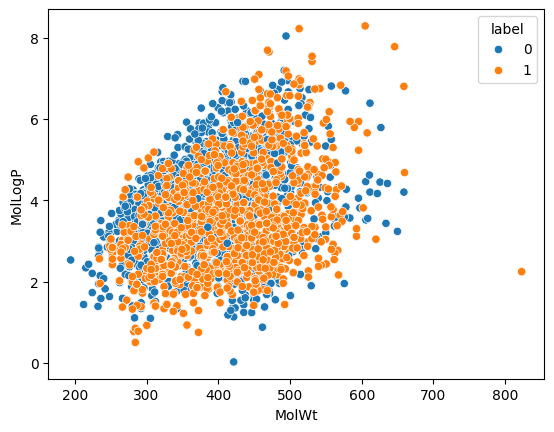

In [37]:
sns.scatterplot(x=df_["MolWt"],y=df_["MolLogP"],hue=df_["label"])

<Axes: xlabel='MolWt', ylabel='TPSA'>

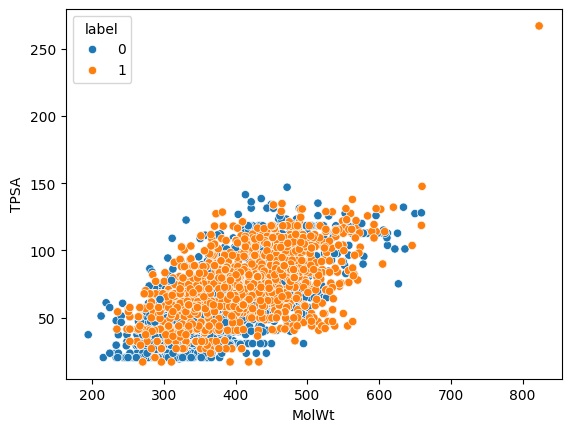

In [ ]:
sns.scatterplot(x=df_["MolWt"],y=df_["TPSA"],hue=df_["label"])

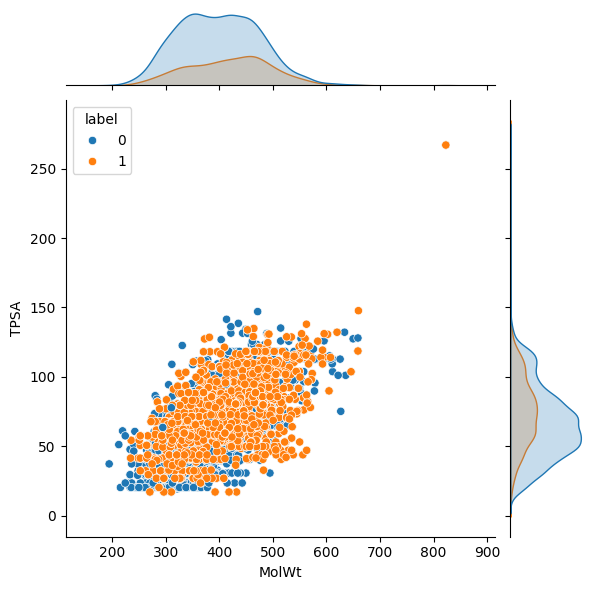

In [ ]:
sns.jointplot(x=df_["MolWt"],y=df_["TPSA"],hue=df_["label"])

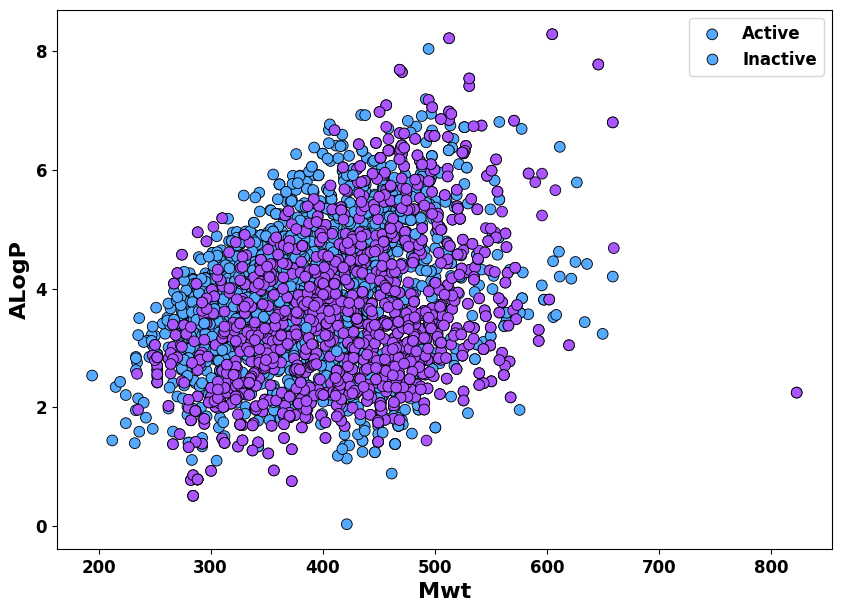

In [50]:
plt.figure(figsize=(10,7))
#hue: to add label
sns.scatterplot(x=df_["MolWt"],y=df_["MolLogP"],hue=df_["label"],edgecolor="black",palette="cool",s=60,alpha=1)

plt.xlabel("Mwt",size=16,weight="bold")

plt.ylabel("ALogP",size=16,weight="bold")

plt.xticks(weight="bold",size=12)

plt.yticks(weight="bold",size=12)

plt.legend(["Active","Inactive"],prop={"weight":"bold","size":"12"})

plt.savefig("scatterplot.png",dpi=300)

plt.show()



<ipython-input-51-0d54c71b42c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_["label"],y=df_["MolWt"],palette="cool",width=0.5,linewidth=2.5,boxprops={'edgecolor': 'black'},whiskerprops={'color': 'black'},capprops={'color': 'black'},medianprops={'color': 'black'},flierprops={'markerfacecolor': "black"},showmeans=True)


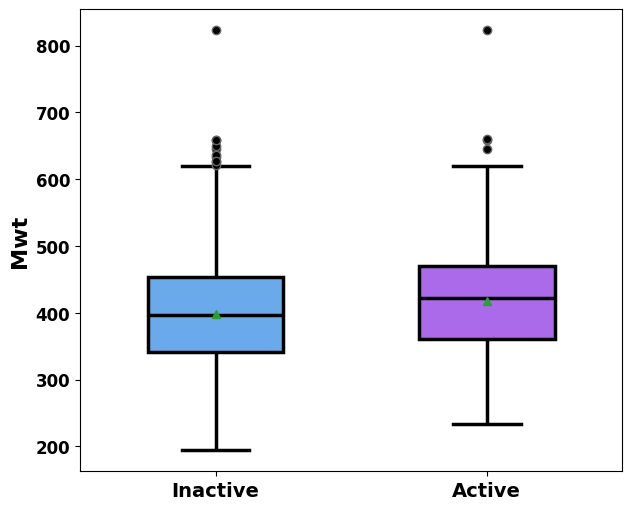

In [51]:
plt.figure(figsize=(7,6))

sns.boxplot(x=df_["label"],y=df_["MolWt"],palette="cool",width=0.5,linewidth=2.5,boxprops={'edgecolor': 'black'},whiskerprops={'color': 'black'},capprops={'color': 'black'},medianprops={'color': 'black'},flierprops={'markerfacecolor': "black"},showmeans=True)

plt.xlabel("",size=16,weight="bold")

plt.ylabel("Mwt",size=16,weight="bold")

plt.xticks([0,1],["Inactive","Active"],weight="bold",size=14)

plt.yticks(weight="bold",size=12)

plt.savefig("box_mwt.png",dpi=300)


plt.show()

<ipython-input-52-57ba3545b0d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_["label"],y=df_["NumHAcceptors"],palette="cool",width=0.5,linewidth=2.5,boxprops={'edgecolor': 'black'},whiskerprops={'color': 'black'},capprops={'color': 'black'},medianprops={'color': 'black'},flierprops={'markerfacecolor': "black"},showmeans=True)


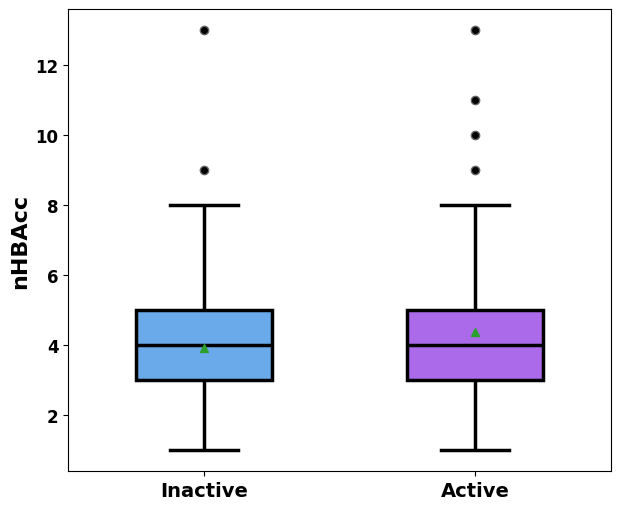

In [52]:
plt.figure(figsize=(7,6))

sns.boxplot(x=df_["label"],y=df_["NumHAcceptors"],palette="cool",width=0.5,linewidth=2.5,boxprops={'edgecolor': 'black'},whiskerprops={'color': 'black'},capprops={'color': 'black'},medianprops={'color': 'black'},flierprops={'markerfacecolor': "black"},showmeans=True)

plt.xlabel("",size=16,weight="bold")

plt.ylabel("nHBAcc",size=16,weight="bold")

plt.xticks([0,1],["Inactive","Active"],weight="bold",size=14)

plt.yticks(weight="bold",size=12)

plt.savefig("box_nHBAcc.png",dpi=300)


plt.show()

<ipython-input-53-27d027a9ebc5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_["label"],y=df_["NumHDonors"],palette="cool",width=0.5,medianprops={'color': 'blue'},linewidth=2.5,boxprops={'edgecolor': 'black'},whiskerprops={'color': 'black'},capprops={'color': 'black'},flierprops={'markerfacecolor': "black"},showmeans=True)


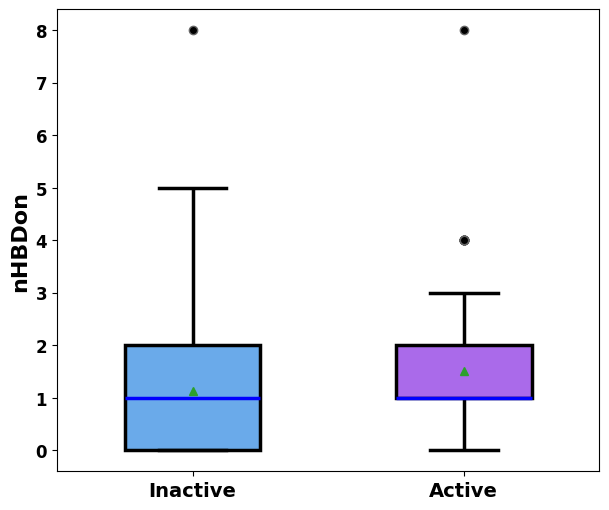

In [53]:
plt.figure(figsize=(7,6))

sns.boxplot(x=df_["label"],y=df_["NumHDonors"],palette="cool",width=0.5,medianprops={'color': 'blue'},linewidth=2.5,boxprops={'edgecolor': 'black'},whiskerprops={'color': 'black'},capprops={'color': 'black'},flierprops={'markerfacecolor': "black"},showmeans=True)

plt.xlabel("",size=16,weight="bold")

plt.ylabel("nHBDon",size=16,weight="bold")

plt.xticks([0,1],["Inactive","Active"],weight="bold",size=14)

plt.yticks(weight="bold",size=12)

plt.savefig("box_nHBDon.png",dpi=300)


plt.show()

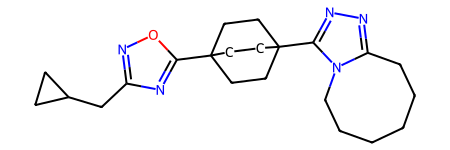

In [55]:
mol = df["ROMol"][0]

mol

In [56]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol,2,1024, bitInfo =bi)

In [57]:
fp.ToBitString()

'001010000000000000000001000001000000100000000000000000000000000000000000100000001000000000000100000000100000000000000000000000000000000100101000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000001000000000000000000010000000010000000000000000000000000000000000000000000001000000000000000000010100000000000000000000000000000000000000000010000000000000000000000000000000000101000000000000010000000000000000000000000000000000000000000001000000000000010000000000000000000000010000000000000000100000000000000000000000000000000000000000000000000000010000000000000000001000000001000000000000000000000000000000000000000000000000000000000100000000100000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000100000000000001000000000000000000100000000000000001010000000000000000000000000000000000000000001000000001000000000000000000000000000000000000001000000000001100000000000

In [58]:
list(fp.GetOnBits())

[2,
 4,
 23,
 29,
 36,
 72,
 80,
 93,
 102,
 135,
 138,
 140,
 248,
 281,
 301,
 310,
 356,
 376,
 378,
 421,
 456,
 458,
 472,
 518,
 532,
 556,
 573,
 628,
 647,
 656,
 714,
 723,
 780,
 831,
 845,
 864,
 881,
 883,
 926,
 935,
 974,
 986,
 987,
 1019]

In [59]:
bi

{2: ((1, 2), (0, 2)),
 4: ((1, 1), (2, 1), (0, 1), (27, 1)),
 23: ((16, 2),),
 29: ((17, 1),),
 36: ((9, 0), (12, 0)),
 72: ((21, 2),),
 80: ((16, 0),),
 93: ((8, 2),),
 102: ((8, 1),),
 135: ((12, 1), (9, 1)),
 138: ((10, 1), (11, 1), (22, 1), (24, 1), (23, 1), (25, 1)),
 140: ((6, 1), (7, 1)),
 248: ((21, 1),),
 281: ((15, 2), (7, 2)),
 301: ((18, 1), (19, 1)),
 310: ((27, 2),),
 356: ((5, 0), (8, 0), (13, 0), (15, 0)),
 376: ((20, 2),),
 378: ((6, 0), (7, 0), (14, 0), (20, 0)),
 421: ((5, 1),),
 456: ((3, 1),),
 458: ((16, 1),),
 472: ((4, 1),),
 518: ((20, 1),),
 532: ((14, 2),),
 556: ((26, 2),),
 573: ((17, 2),),
 628: ((6, 2),),
 647: ((18, 2),),
 656: ((21, 0),),
 714: ((26, 1),),
 723: ((13, 1),),
 780: ((13, 2),),
 831: ((14, 1),),
 845: ((9, 2),),
 864: ((11, 2), (22, 2), (24, 2), (10, 2), (23, 2), (25, 2)),
 881: ((12, 2),),
 883: ((15, 1),),
 926: ((0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (10, 0),
  (11, 0),
  (18, 0),
  (19, 0),
  (22, 0),
  (23, 0),
  (24, 0),
  (25, 0),


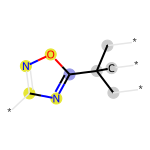

In [62]:
Draw.DrawMorganBit(mol,780,bi)

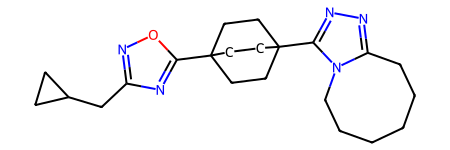

In [63]:
mol

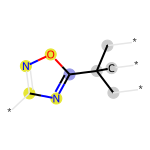

In [72]:
Draw.DrawMorganBit(mol,780,bi,whichExample=0)

In [73]:
bits = [(mol,x,bi) for x in fp.GetOnBits()]

bits

[(<rdkit.Chem.rdchem.Mol at 0x79602f902810>,
  2,
  {2: ((1, 2), (0, 2)),
   4: ((1, 1), (2, 1), (0, 1), (27, 1)),
   23: ((16, 2),),
   29: ((17, 1),),
   36: ((9, 0), (12, 0)),
   72: ((21, 2),),
   80: ((16, 0),),
   93: ((8, 2),),
   102: ((8, 1),),
   135: ((12, 1), (9, 1)),
   138: ((10, 1), (11, 1), (22, 1), (24, 1), (23, 1), (25, 1)),
   140: ((6, 1), (7, 1)),
   248: ((21, 1),),
   281: ((15, 2), (7, 2)),
   301: ((18, 1), (19, 1)),
   310: ((27, 2),),
   356: ((5, 0), (8, 0), (13, 0), (15, 0)),
   376: ((20, 2),),
   378: ((6, 0), (7, 0), (14, 0), (20, 0)),
   421: ((5, 1),),
   456: ((3, 1),),
   458: ((16, 1),),
   472: ((4, 1),),
   518: ((20, 1),),
   532: ((14, 2),),
   556: ((26, 2),),
   573: ((17, 2),),
   628: ((6, 2),),
   647: ((18, 2),),
   656: ((21, 0),),
   714: ((26, 1),),
   723: ((13, 1),),
   780: ((13, 2),),
   831: ((14, 1),),
   845: ((9, 2),),
   864: ((11, 2), (22, 2), (24, 2), (10, 2), (23, 2), (25, 2)),
   881: ((12, 2),),
   883: ((15, 1),),
   926:

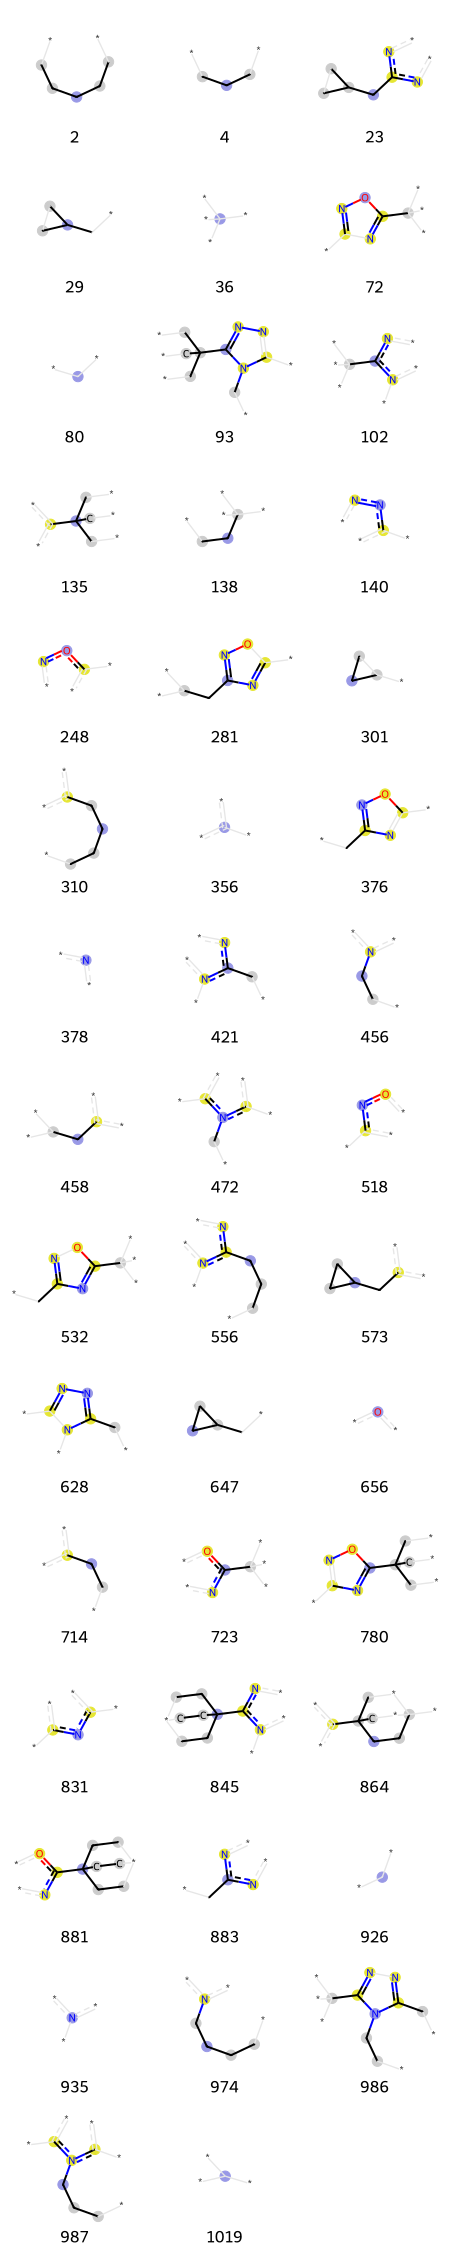

In [75]:
Draw.DrawMorganBits(bits,molsPerRow=3, legends=[str(x) for x in fp.GetOnBits()])

In [76]:
fps = [AllChem.GetMorganFingerprintAsBitVect(mol,2,1024) for mol in df["ROMol"]]

fps

 ...]

In [78]:
from rdkit.Chem import DataStructs
from tqdm import tqdm
tanimoto = []

for i in tqdm(range(len(fps))):
  for j in range(i+1,len(fps)):
    tanimoto.append(DataStructs.TanimotoSimilarity(fps[i],fps[j]))

100%|██████████| 4392/4392 [00:27<00:00, 157.53it/s] 


<Axes: ylabel='Count'>

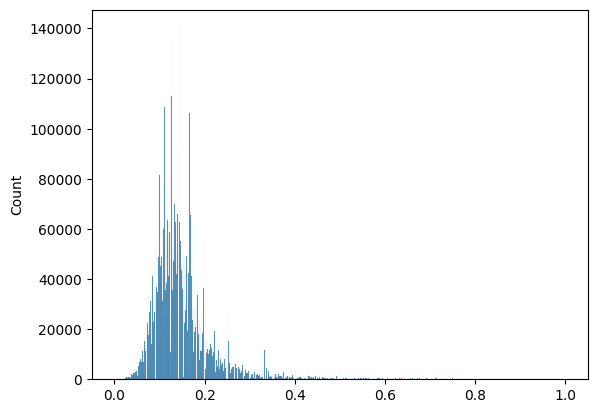

In [79]:
sns.histplot(tanimoto)

In [115]:
import numpy as np
sim_matrix = np.zeros((len(fps),len(fps)))
for i in range(len(fps)):

  sim = DataStructs.BulkTanimotoSimilarity(fps[i],fps[i:])
  sim_matrix[i,i:] = sim
  sim_matrix[i:,i] = sim


In [116]:
pd.DataFrame(sim_matrix)

,0,1,2,3,4,5,6,7,8,9,...,4382,4383,4384,4385,4386,4387,4388,4389,4390,4391
0,1.000000,0.166667,0.078652,0.086957,0.102273,0.074074,0.072289,0.064516,0.118280,0.080808,...,0.119565,0.117021,0.129032,0.117021,0.134146,0.129412,0.104167,0.105263,0.131868,0.141026
1,0.166667,1.000000,0.076087,0.084211,0.149425,0.084337,0.082353,0.108696,0.138298,0.134021,...,0.152174,0.161290,0.161290,0.148936,0.156627,0.151163,0.147368,0.148936,0.152174,0.150000
2,0.078652,0.076087,1.000000,0.741935,0.117021,0.104651,0.102273,0.114583,0.131313,0.116505,...,0.110000,0.118812,0.107843,0.097087,0.109890,0.094737,0.106796,0.107843,0.132653,0.114943
3,0.086957,0.084211,0.741935,1.000000,0.123711,0.112360,0.097826,0.121212,0.104762,0.112150,...,0.105769,0.103774,0.093458,0.093458,0.105263,0.090909,0.102804,0.103774,0.116505,0.109890
4,0.102273,0.149425,0.117021,0.123711,1.000000,0.263158,0.209877,0.186813,0.378049,0.234043,...,0.166667,0.151515,0.151515,0.163265,0.133333,0.141304,0.161616,0.175258,0.154639,0.126437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,0.129412,0.151163,0.094737,0.090909,0.141304,0.104651,0.102273,0.138298,0.142857,0.138614,...,0.656716,0.686567,0.712121,0.712121,0.771930,1.000000,0.652174,0.686567,0.656716,0.732143
4388,0.104167,0.147368,0.106796,0.102804,0.161616,0.117021,0.114583,0.147059,0.161905,0.146789,...,0.680556,0.708333,0.662162,0.808824,0.585714,0.652174,1.000000,0.863636,0.571429,0.573529
4389,0.105263,0.148936,0.107843,0.103774,0.175258,0.118280,0.115789,0.137255,0.174757,0.148148,...,0.714286,0.794118,0.742857,0.906250,0.617647,0.686567,0.863636,1.000000,0.600000,0.582090
4390,0.131868,0.152174,0.132653,0.116505,0.154639,0.108696,0.106383,0.128713,0.155340,0.140187,...,0.787879,0.714286,0.739130,0.621622,0.687500,0.656716,0.571429,0.600000,1.000000,0.625000


<Axes: >

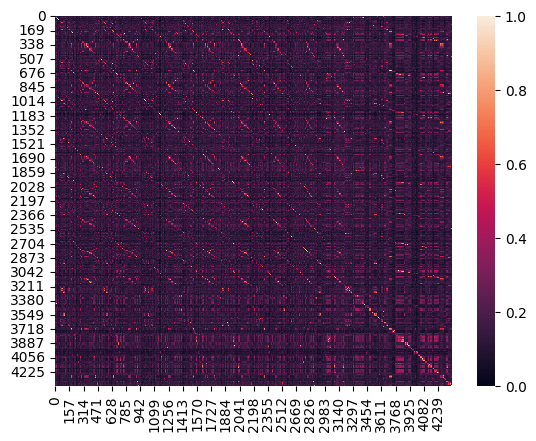

In [117]:
sns.heatmap(sim_matrix)

In [118]:
!python modi.py dataset_class.csv -l label -n 2048 -r 2 -s smiles_std

python3: can't open file '/content/modi.py': [Errno 2] No such file or directory


In [113]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  #seed the random number generator
  seed(1)

  #actives and inactives
  selection = [descriptor, 'label']
  df = df_[selection]
  agonist = df[df['label'] == 1]
  agonist = agonist[descriptor]

  selection = [descriptor, 'label']
  df = df_[selection]
  antagonist = df[df['label'] == 0]
  antagonist = antagonist[descriptor]

  #compare samples
  stat, p = mannwhitneyu(agonist, antagonist)
  print('Statistics=%.3f, p=%.3f' % (stat, p))

  alpha = 0.01
  if p > alpha:

    interpretation = 'Same distribution (fail to reject H0)'

  else:

    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  return results

In [93]:
mannwhitney("MolWt", verbose=False)

Statistics=2187246.000, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,MolWt,2187246.0,1.746320e-14,0.01,Different distribution (reject H0)


In [94]:
mannwhitney("MolLogP", verbose=False)

Statistics=1705385.000, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,MolLogP,1705385.0,1.543264e-07,0.01,Different distribution (reject H0)


In [95]:
mannwhitney("NumHAcceptors", verbose=False)

Statistics=2230573.500, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2230573.5,1.591215e-19,0.01,Different distribution (reject H0)


In [97]:
mannwhitney("NumHDonors", verbose=False)

Statistics=2328682.500, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2328682.5,2.273216e-33,0.01,Different distribution (reject H0)
